In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Cars.csv')
df.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,13495
1,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,16500
2,1,?,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154,19,26,16500
3,2,164,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102,24,30,13950
4,2,164,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115,18,22,17450


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   body-style         205 non-null    object 
 5   drive-wheels       205 non-null    object 
 6   engine-location    205 non-null    object 
 7   width              205 non-null    float64
 8   height             205 non-null    float64
 9   engine-type        205 non-null    object 
 10  engine-size        205 non-null    int64  
 11  horsepower         205 non-null    object 
 12  city-mpg           205 non-null    int64  
 13  highway-mpg        205 non-null    int64  
 14  price              205 non-null    int64  
dtypes: float64(2), int64(5), object(8)
memory usage: 24.1+ KB


In [4]:
df.describe()

,symboling,width,height,engine-size,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,65.907805,53.724878,126.907317,25.219512,30.751220,13227.478049
std,1.245307,2.145204,2.443522,41.642693,6.542142,6.886443,7902.651615
min,-2.000000,60.300000,47.800000,61.000000,13.000000,16.000000,5118.000000
25%,0.000000,64.100000,52.000000,97.000000,19.000000,25.000000,7788.000000
50%,1.000000,65.500000,54.100000,120.000000,24.000000,30.000000,10345.000000
75%,2.000000,66.900000,55.500000,141.000000,30.000000,34.000000,16500.000000
max,3.000000,72.300000,59.800000,326.000000,49.000000,54.000000,45400.000000


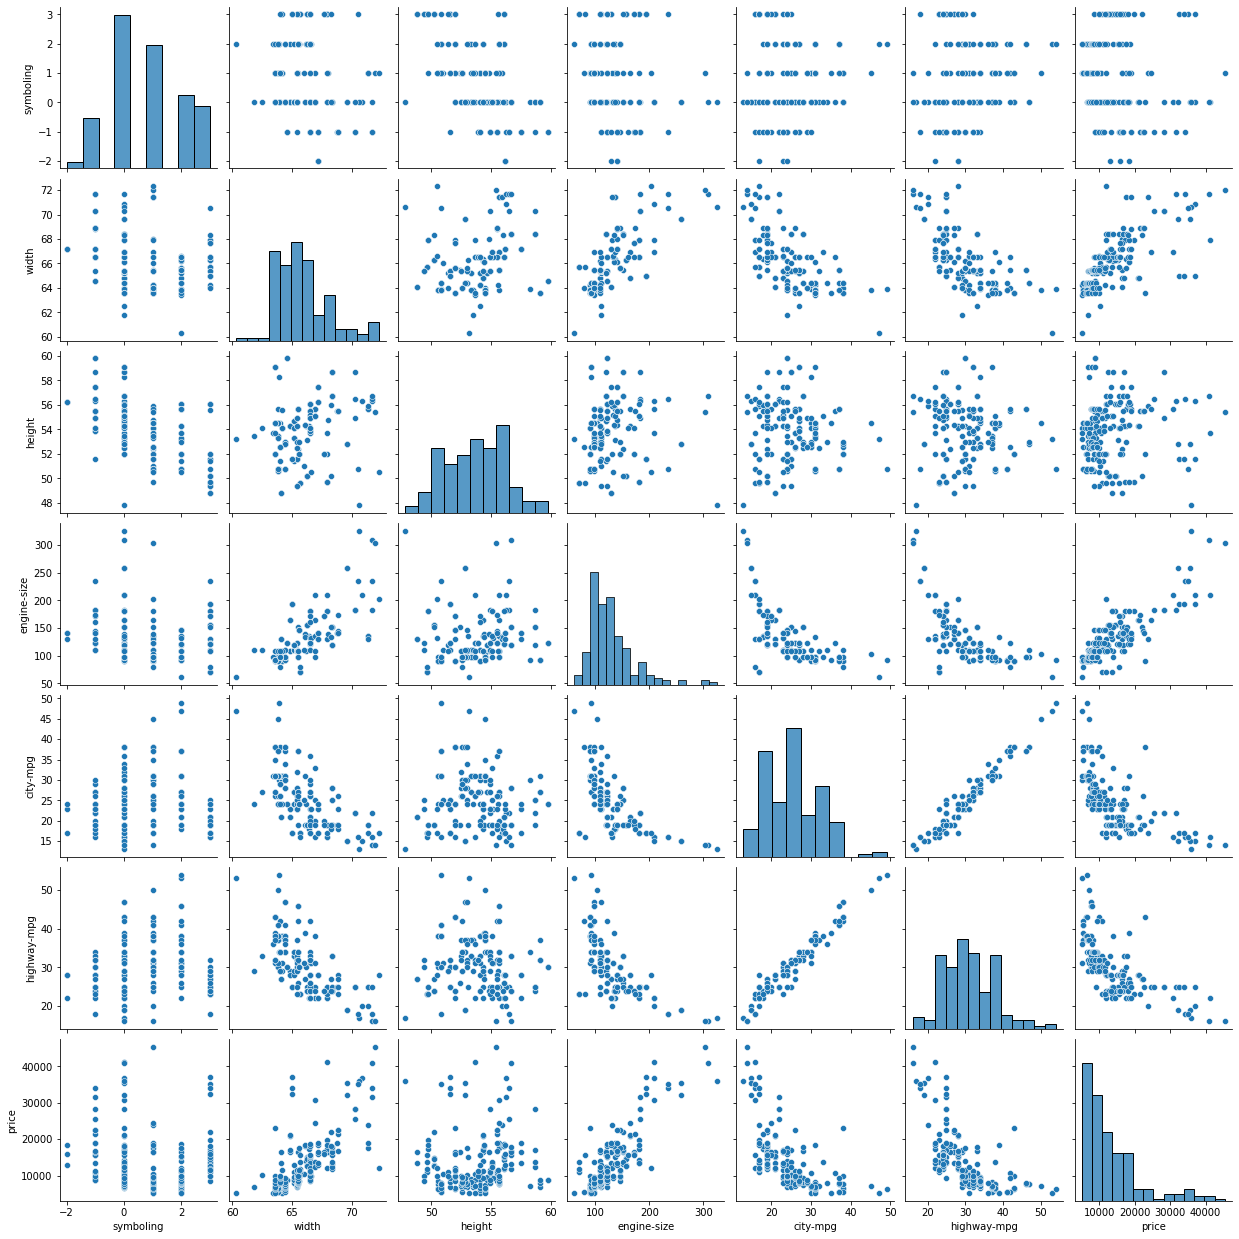

In [5]:
sns.pairplot(df)

<AxesSubplot:>

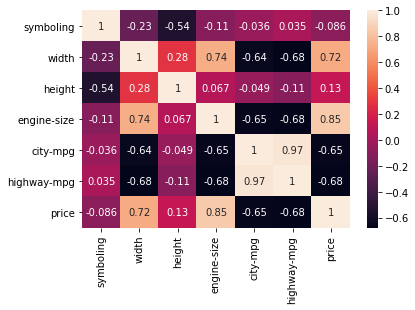

In [6]:
sns.heatmap(df.corr(),annot=True)

# Handling Missing Value


In [7]:
df['normalized-losses'].replace('?',np.nan,inplace=True)
df['horsepower'].replace('?',np.nan,inplace=True)



In [8]:
df['normalized-losses']=df['normalized-losses'].astype('float')
df['horsepower']=df['horsepower'].astype('float')

In [9]:
nlmean=df['normalized-losses'].mean()
hpmean=df['horsepower'].mean()

In [10]:
df['normalized-losses'].fillna(nlmean,inplace=True)
df['horsepower'].fillna(hpmean,inplace=True)

# Handling Outlier

<AxesSubplot:xlabel='price', ylabel='make'>

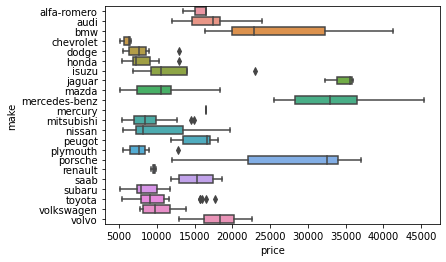

In [11]:
sns.boxplot(data=df,x='price',y='make')

In [12]:
df[(df['make']=='dodge')&(df['price']>10000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
29,3,145.0,dodge,gas,hatchback,fwd,front,66.3,50.2,ohc,156,145.0,19,24,12964


In [13]:
df.drop(29,inplace=True)

In [14]:
df[(df['make']=='honda')&(df['price']>10000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
40,0,85.0,honda,gas,sedan,fwd,front,62.5,54.1,ohc,110,86.0,27,33,10295
41,0,85.0,honda,gas,sedan,fwd,front,65.2,54.1,ohc,110,101.0,24,28,12945
42,1,107.0,honda,gas,sedan,fwd,front,66.0,51.0,ohc,110,100.0,25,31,10345


In [15]:
df.drop([40,41,42],inplace=True)

In [16]:
df[(df['make']=='isuzu')&(df['price']>12000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
45,0,122.0,isuzu,gas,sedan,fwd,front,63.6,52.0,ohc,90,70.0,38,43,23000


In [17]:
df.drop(45,inplace=True)

In [18]:
df[(df['make']=='mitsubishi')&(df['price']>13000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
83,3,122.0,mitsubishi,gas,hatchback,fwd,front,66.3,50.2,ohc,156,145.0,19,24,14869
84,3,122.0,mitsubishi,gas,hatchback,fwd,front,66.3,50.2,ohc,156,145.0,19,24,14489


In [19]:
df.drop([83,84],inplace=True)

In [20]:
df[(df['make']=='plymouth')&(df['price']>10000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
124,3,122.0,plymouth,gas,hatchback,rwd,front,66.3,50.2,ohc,156,145.0,19,24,12764


In [21]:
df.drop(124,inplace=True)

In [22]:
df[(df['make']=='toyota')&(df['price']>13000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
172,2,134.0,toyota,gas,convertible,rwd,front,65.6,53.0,ohc,146,116.0,24,30,17669
178,3,197.0,toyota,gas,hatchback,rwd,front,67.7,52.0,dohc,171,161.0,20,24,16558
179,3,197.0,toyota,gas,hatchback,rwd,front,67.7,52.0,dohc,171,161.0,19,24,15998
180,-1,90.0,toyota,gas,sedan,rwd,front,66.5,54.1,dohc,171,156.0,20,24,15690
181,-1,122.0,toyota,gas,wagon,rwd,front,66.5,54.1,dohc,161,156.0,19,24,15750


In [23]:
df.drop([172,178,179,180,181],inplace=True)

<AxesSubplot:xlabel='price', ylabel='make'>

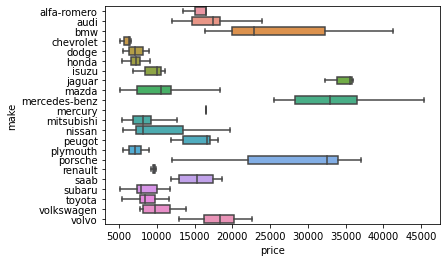

In [24]:
sns.boxplot(data=df,x='price',y='make')

# Encoding Categorical Data

In [25]:
df_cat=df.select_dtypes("object")
df_num=df.select_dtypes(['float64','int64'])

In [26]:
from sklearn.preprocessing import LabelEncoder

In [27]:
le=LabelEncoder()

In [28]:
for col in df_cat:
     le=LabelEncoder()
     df_cat[col]=le.fit_transform(df_cat[col])
  

In [29]:
df_cat

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type
0,0,1,0,2,0,0
1,0,1,0,2,0,0
2,0,1,2,2,0,5
3,1,1,3,1,0,3
4,1,1,3,0,0,3
...,...,...,...,...,...,...
200,21,1,3,2,0,3
201,21,1,3,2,0,3
202,21,1,3,2,0,5
203,21,0,3,2,0,3


In [30]:
df_new=pd.concat([df_cat,df_num],axis=1)
df_new

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price
0,0,1,0,2,0,0,3,122.0,64.1,48.8,130,111.0,21,27,13495
1,0,1,0,2,0,0,3,122.0,64.1,48.8,130,111.0,21,27,16500
2,0,1,2,2,0,5,1,122.0,65.5,52.4,152,154.0,19,26,16500
3,1,1,3,1,0,3,2,164.0,66.2,54.3,109,102.0,24,30,13950
4,1,1,3,0,0,3,2,164.0,66.4,54.3,136,115.0,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,21,1,3,2,0,3,-1,95.0,68.9,55.5,141,114.0,23,28,16845
201,21,1,3,2,0,3,-1,95.0,68.8,55.5,141,160.0,19,25,19045
202,21,1,3,2,0,5,-1,95.0,68.9,55.5,173,134.0,18,23,21485
203,21,0,3,2,0,3,-1,95.0,68.9,55.5,145,106.0,26,27,22470


In [31]:
x=df_new.iloc[:,:-1]
y=df_new.iloc[:,-1]

# Spliting Data

In [32]:
from sklearn.model_selection import train_test_split,cross_val_score
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)

In [33]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
linreg=LinearRegression()
linreg.fit(xtrain,ytrain)


LinearRegression()

In [34]:
ypred=linreg.predict(xtest)

In [35]:
linreg.score(xtrain,ytrain)

0.8489126943119092

In [36]:
linreg.score(xtest,ytest)

0.8458898559616761

In [37]:
from sklearn.metrics import r2_score
print(f'Accuracy: {r2_score(ytest,ypred)}')

Accuracy: 0.8458898559616761


In [45]:
for i in range(100):
    l2 = Ridge(alpha=i)
    l2.fit(xtrain, ytrain)
    print(f"{i} -: {l2.score(xtest, ytest)}")

0 -: 0.845889855961674
1 -: 0.8538329178819614
2 -: 0.8548293996371048
3 -: 0.8549276821157363
4 -: 0.8548236915888541
5 -: 0.8546558375369884
6 -: 0.8544617560246156
7 -: 0.8542545509065891
8 -: 0.8540399697101594
9 -: 0.8538211186130863
10 -: 0.853599968956938
11 -: 0.8533779086898093
12 -: 0.8531559741780448
13 -: 0.8529349630467608
14 -: 0.8527154976741103
15 -: 0.8524980656648559
16 -: 0.8522830481572656
17 -: 0.8520707408803644
18 -: 0.8518613704328897
19 -: 0.8516551071680223
20 -: 0.8514520755415165
21 -: 0.8512523625009778
22 -: 0.8510560243304565
23 -: 0.8508630922602344
24 -: 0.8506735770803683
25 -: 0.850487472945131
26 -: 0.8503047605170203
27 -: 0.8501254095695158
28 -: 0.849949381144733
29 -: 0.8497766293439707
30 -: 0.8496071028146668
31 -: 0.8494407459857014
32 -: 0.8492775000936343
33 -: 0.8491173040349289
34 -: 0.8489600950730618
35 -: 0.8488058094244393
36 -: 0.8486543827429404
37 -: 0.8485057505195726
38 -: 0.8483598484109587
39 -: 0.8482166125081148
40 -: 0.848075

In [46]:
l2 = Ridge(alpha=3)
l2.fit(xtrain, ytrain)
ypred = l2.predict(xtest)

print(r2_score(ytest, ypred))

0.8549276821157363


In [47]:
for i in range(0,1000,50):
    l1 = Lasso(alpha=i)
    l1.fit(xtrain, ytrain)
    print(f"{i} -: {l1.score(xtest, ytest)}")

0 -: 0.8458898559616741
50 -: 0.8549610753642817
100 -: 0.8562056228453563
150 -: 0.8501140596308056
200 -: 0.8447806517909715
250 -: 0.842702264182379
300 -: 0.8400883466252694
350 -: 0.8372793070116105
400 -: 0.8356060499243616
450 -: 0.8336392366606126
500 -: 0.8322853763207003
550 -: 0.831851467603237
600 -: 0.8313882046163016
650 -: 0.8311988296659129
700 -: 0.8310069247471398
750 -: 0.8306984316639692
800 -: 0.8303663706837179
850 -: 0.8300125188062828
900 -: 0.8296361249404258
950 -: 0.8292380371108676


In [48]:
l1 = Lasso(alpha=100)
l1.fit(xtrain, ytrain)
ypred = l1.predict(xtest)
print(r2_score(ytest, ypred))

0.8562056228453563


# Cross Validation

In [50]:
from sklearn.model_selection import cross_val_score

In [51]:
cvs = cross_val_score(l2, x,y, cv=4)

In [52]:
cvs

array([0.81364801, 0.86927209, 0.37977458, 0.35827645])

In [53]:
cvs.mean()

0.6052427816670167

In [54]:
cvs = cross_val_score(l1, x,y, cv=4)

In [56]:
cvs

array([0.81958199, 0.84663894, 0.38699639, 0.3703719 ])